# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = study_data_complete['Mouse ID'].value_counts()

mouse_count = len(mouse_count)
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
                                                                                
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete.loc[study_data_complete['Mouse ID']=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mice)==False]

study_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = study_data_cleaned['Mouse ID'].value_counts()

clean_mouse_count = len(clean_mouse_count)
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = study_data_cleaned['Tumor Volume (mm3)'].groupby(study_data_cleaned['Drug Regimen']).mean()
median = study_data_cleaned['Tumor Volume (mm3)'].groupby(study_data_cleaned['Drug Regimen']).median()
variance = study_data_cleaned['Tumor Volume (mm3)'].groupby(study_data_cleaned['Drug Regimen']).var()
std = study_data_cleaned['Tumor Volume (mm3)'].groupby(study_data_cleaned['Drug Regimen']).std()
sem = study_data_cleaned['Tumor Volume (mm3)'].groupby(study_data_cleaned['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": median,
                          "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": std,
                          "Tumor Volume Std. Err.": sem})

summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimen_data = study_data_cleaned.groupby('Drug Regimen')

regimen_summary = regimen_data.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
regimen_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#For bar plot: assign mouse count by drug regimen to variable
count_per_regimen = study_data_cleaned['Drug Regimen'].value_counts()
count_per_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

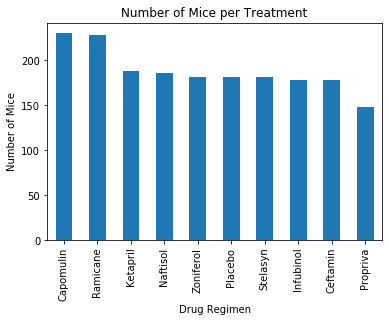

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = count_per_regimen.plot.bar()

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Treatment')

bar_plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

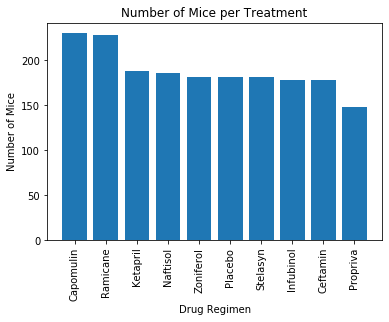

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_per_regimen.index.values
y_axis = count_per_regimen.values

plt.bar(x_axis, y_axis)
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')


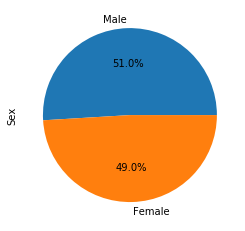

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_vs_f = study_data_cleaned['Sex'].value_counts()
m_vs_f.plot.pie(autopct= '%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fde960ae5d0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

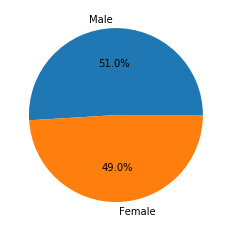

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(m_vs_f, labels=labels, autopct='%1.1f%%')



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_time_merged = last_timepoint.merge(study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')
last_time_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
total_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_time_merged.loc[last_time_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    total_volume.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    upperbound = upperq + (iqr * 1.5)
    lowerbound = lowerq - (iqr * 1.5)
    
    outlier = tumor_volume.loc[(tumor_volume > upperbound) | (tumor_volume < lowerbound)]
    
    print(f'{drug}s potential outliers: {outlier}')
    

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Final Tumor Volume by Drug Regimen')

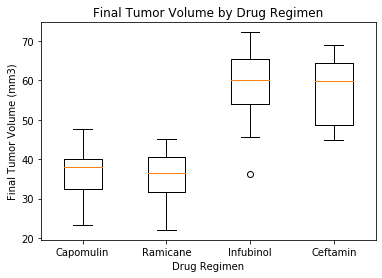

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(total_volume, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Final Tumor Volume by Drug Regimen")

## Line and Scatter Plots

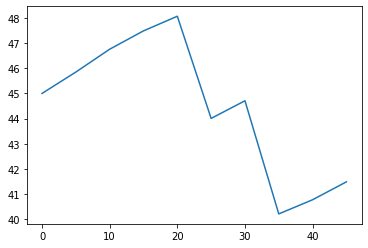

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_regimen = study_data_complete.loc[study_data_complete["Drug Regimen"] == "Capomulin",:]

#Locate data for single mouse in treatment
single_mouse = capomulin_regimen.loc[capomulin_regimen["Mouse ID"] == "l509",:]

#Set x and y axes
x_axis = single_mouse['Timepoint']
volume = single_mouse['Tumor Volume (mm3)']

#Plot
plt.plot(x_axis, volume)
plt.xlabel = ('Timepoint')
plt.ylabel = ('Tumor Volume (mm3)')
plt.title = ('Capomulin treatmeant of Mouse ID l509')


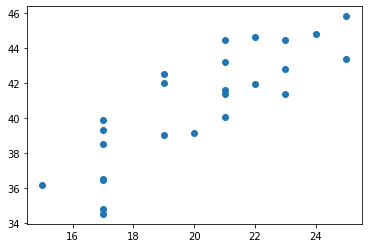

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin = capomulin_regimen.groupby(['Mouse ID']).mean()

plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])

plt.title = ('Average Tumor Volume vs. Mouse Weight')
plt.xlabel = ('Weight (g)')
plt.ylabel = ('Tumor Volume (mm3)')


## Correlation and Regression

The coorelation between mouse weight and average tumor volume is (0.8419363424694717, [2])


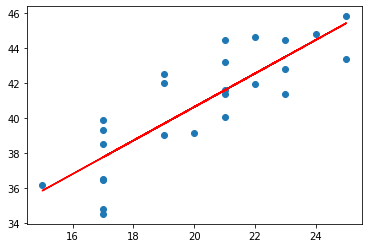

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate and print coorelation coefficient
coorelation = st.pearsonr(average_capomulin['Weight (g)'],average_capomulin['Tumor Volume (mm3)'])[0],[2]
print(f'The coorelation between mouse weight and average tumor volume is {coorelation}')

# Perform a linear regression on weight vs. tumor volume
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Plot linear regression model
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel = ('Weight (g)')
plt.ylabel = ('Tumor Volume (mm3)')
